### Part 1: Understanding Optimizers

1. **Role of Optimization Algorithms:**
   - Optimization algorithms play a crucial role in artificial neural networks by iteratively updating the parameters (weights and biases) of the model during" training to minimize the loss function.
   - They are necessary to find the optimal set of parameters that minimize the difference between predicted and actual outputs, leading to better model performance.

2. **Gradient Descent and Variants:**
   - Gradient descent is a first-order optimization algorithm that minimizes the loss function by iteratively moving in the direction of the steepest descent of the gradient.
   - Variants of gradient descent include:
     - **Stochastic Gradient Descent (SGD):** Computes the gradient using a single random training example at each iteration, which can lead to noisy updates but is computationally efficient.
     - **Mini-batch Gradient Descent:** Computes the gradient using a small subset of the training data (mini-batch), striking a balance between the efficiency of SGD and stability of batch gradient descent.
     - **Adam (Adaptive Moment Estimation):** An adaptive learning rate optimization algorithm that combines the advantages of both momentum and RMSprop, dynamically adjusting the learning rate for each parameter.

3. **Challenges of Traditional Gradient Descent:**
   - Traditional gradient descent methods may suffer from slow convergence, especially in high-dimensional and non-convex optimization problems.
   - They can get stuck in local minima or saddle points, leading to suboptimal solutions.
   - Modern optimizers address these challenges by incorporating adaptive learning rates, momentum, and other techniques to accelerate convergence and escape local minima.

4. **Momentum and Learning Rate:**
   - **Momentum:** Momentum is a hyperparameter that determines the proportion of the previous update to incorporate into the current update. It helps accelerate convergence by smoothing out the oscillations and speeding up the gradient descent process.
   - **Learning Rate:** Learning rate is a hyperparameter that determines the step size in the parameter space during optimization. It influences the rate of convergence and model performance, with a higher learning rate leading to faster convergence but risking overshooting the optimal solution.

### Part 2: Optimizer Techniques

5. **Stochastic Gradient Descent (SGD):**
   - **Concept:** SGD computes the gradient using a single random training example at each iteration, rather than the entire dataset. It updates the parameters based on this single example, making the updates noisy but computationally efficient.
   - **Advantages:**
     - Computationally efficient, especially for large datasets.
     - Helps avoid local minima and saddle points due to the stochastic nature of updates.
     - Can generalize well and escape sharp local minima.
   - **Limitations:**
     - Noisy updates can lead to high variance in parameter updates, which may slow down convergence.
     - May have difficulty converging to the global optimum due to noisy updates.
     - Requires careful tuning of learning rate and other hyperparameters.
   - **Suitability:**
     - Suitable for large datasets where computing gradients for the entire dataset is impractical.
     - Effective in scenarios where the loss landscape is rough and has many local minima.

6. **Adam Optimizer:**
   - **Concept:** Adam (Adaptive Moment Estimation) is an adaptive learning rate optimization algorithm that combines momentum and adaptive learning rates. It maintains per-parameter learning rates and momentum by computing adaptive estimates of first and second moments of gradients.
   - **Benefits:**
     - Adaptive learning rates for each parameter, leading to faster convergence and improved generalization.
     - Momentum-like behavior smooths the optimization trajectory, helping to accelerate convergence.
     - Suitable for a wide range of problems and requires minimal tuning of hyperparameters.
   - **Drawbacks:**
     - May suffer from high memory usage due to the storage of past gradient information for each parameter.
     - Can exhibit oscillatory behavior in some cases, especially with high-dimensional parameter spaces.
   - **Suitability:**
     - Well-suited for a variety of optimization problems, particularly those with large-scale datasets and high-dimensional parameter spaces.

7. **RMSprop Optimizer:**
   - **Concept:** RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm that addresses the challenges of adaptive learning rates by normalizing the gradients based on their root mean square. It scales the learning rates differently for each parameter based on the magnitude of the gradients.
   - **Comparison with Adam:**
     - Similar to Adam, RMSprop adapts learning rates for each parameter based on their historical gradients.
     - However, RMSprop does not maintain momentum-like behavior and uses a simpler update rule compared to Adam.
   - **Strengths and Weaknesses:**
     - RMSprop is less computationally expensive compared to Adam due to the absence of momentum.
     - It may converge faster in some cases but can exhibit slower convergence in others compared to Adam.
     - RMSprop may require more careful tuning of hyperparameters compared to Adam.
   - **Suitability:**
     - Suitable for scenarios where adaptive learning rates are beneficial, but the computational overhead of momentum is undesirable.


# Part 3 implementation

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models , optimizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2024-03-12 17:33:02.174604: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 17:33:02.179387: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 17:33:02.254157: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 17:33:03.451355: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
# Define the neural network architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


Training model with SGD optimizer:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6801 - loss: 1.1109 - val_accuracy: 0.9020 - val_loss: 0.3655
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8799 - loss: 0.4155 - val_accuracy: 0.9197 - val_loss: 0.2931
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9068 - loss: 0.3336 - val_accuracy: 0.9284 - val_loss: 0.2549
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9178 - loss: 0.2917 - val_accuracy: 0.9355 - val_loss: 0.2330
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9235 - loss: 0.2712 - val_accuracy: 0.9410 - val_loss: 0.2125
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9286 - loss: 0.2490
Test accuracy with SGD optimizer: 0.9409999847412109


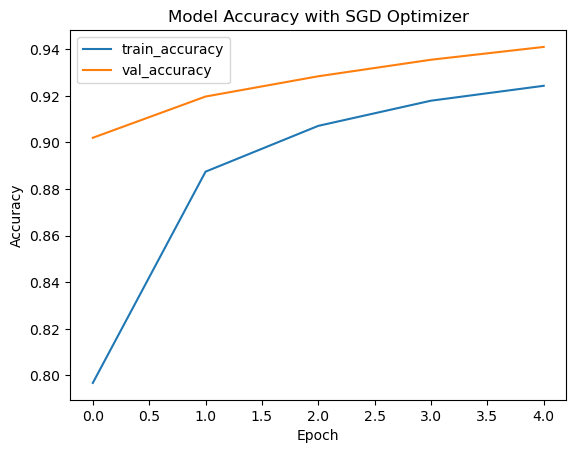


Training model with Adam optimizer:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9320 - loss: 0.2345 - val_accuracy: 0.9651 - val_loss: 0.1215
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9601 - loss: 0.1401 - val_accuracy: 0.9714 - val_loss: 0.0935
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1073 - val_accuracy: 0.9756 - val_loss: 0.0813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0871 - val_accuracy: 0.9741 - val_loss: 0.0853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9772 - loss: 0.0754 - val_accuracy: 0.9768 - val_loss: 0.0753
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9723 - loss: 0.0899
Test accuracy with Adam optimizer: 0.9768000245094299


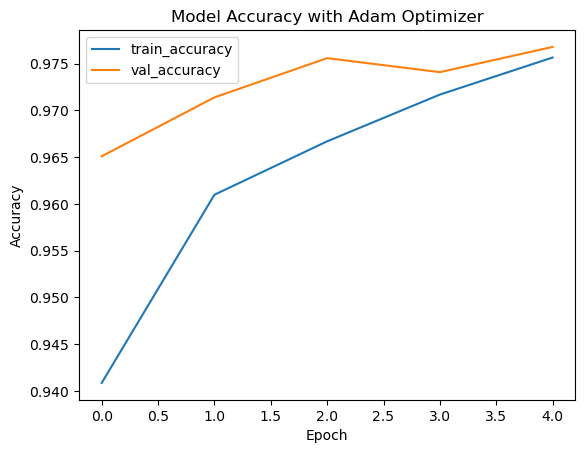


Training model with RMSprop optimizer:


In [ ]:
# Compile the model with different optimizers
optimizers_list = {
    'SGD': optimizers.SGD(),
    'Adam': optimizers.Adam(),
    'RMSprop': optimizers.RMSprop()
}

for optimizer_name, optimizer in optimizers_list.items():
    print(f"\nTraining model with {optimizer_name} optimizer:")
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    
    # Evaluate model performance
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy with {optimizer_name} optimizer: {test_acc}")

    # Plot training history
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Model Accuracy with {optimizer_name} Optimizer')
    plt.legend()
    plt.show()